# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Qistina Muharrifa
- **Email:** qmqistina@gmail.com
- **ID Dicoding:** qistina

## Menentukan Pertanyaan Bisnis

- Bagaimana tren total penyewa sepeda (baik casual maupun registered) setiap bulannya pada tahun 2012 pada dataset day.csv?
- Bagaimana hubungan antara total penyewa sepeda dengan suhu temperatur lingkungan pada dataset day.csv?
- Musim apa yang paling banyak memiliki penyewa sepeda pada dataset day.csv?
- Pada hari apakah masyarakat kebanyakan menyewa sepeda pada dataset day.csv?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Melakukan import libraries yang dibuuthkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk keperluan warning agar tidak terlihat
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Wrangling

### Gathering Data

Dataset yang digunakan adalah **Bike Sharing Dataset** yang bersumber dari Dicoding dan Kaggle. Dataset terdiri dari 2 buah file csv (day.csv dan hour.csv). Deskripsi data berada pada `Readme.txt`.

In [2]:
# Import data day.csv menggunakan Pandas
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Import data hour.csv menggunakan Pandas
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Selanjutnya mengidentifikasi masalah yang terdapat pada dataset tersebut. Pada pengerjaan ini saya melakukan pengecekan pada missing value, duplicated data, data type checking, inconsistent value, dan outlier.

#### Day

Sebelum itu cek dulu berapa jumlah dari baris dan kolom pada data

In [4]:
day_df.shape

(731, 16)

Artinya, memiliki 731 baris dan 16 kolom

1. Missing Value


In [5]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak tedapat missing value pada day_df

2. Duplicated Data

In [6]:
day_df.duplicated().sum()

0

Tidak terdapat duplikasi data pada day_df

3. Inconsistent Value

In [7]:
df_describe =[]

# Check setiap barisnya
for i in day_df.columns: 
    df_describe.append([
        i,
        day_df[i].nunique(),
        day_df[i].unique()
    ])

DESC = pd.DataFrame(df_describe, columns=['column', 'total unique', 'unique'])
DESC

,column,total unique,unique
0,instant,731,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,dteday,731,"[2011-01-01, 2011-01-02, 2011-01-03, 2011-01-0..."
2,season,4,"[1, 2, 3, 4]"
3,yr,2,"[0, 1]"
4,mnth,12,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
5,holiday,2,"[0, 1]"
6,weekday,7,"[6, 0, 1, 2, 3, 4, 5]"
7,workingday,2,"[0, 1]"
8,weathersit,3,"[2, 1, 3]"
9,temp,499,"[0.344167, 0.363478, 0.196364, 0.2, 0.226957, ..."


Terlihat bahwa value yang ada pada setiap kolom sudah sesuai dengan apa yang seharusnya dan deskripsi (misalnya weekday ada 7 (0-6), hour ada 24, year ada 2011 dan 2012 (0 dan 1), dan seterusnya)

4. Data Type Checking

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terlihat bahwa 'dteday' memiliki data type object. Kita dapat mengubahnya menjadi datetime pada tahap Cleaning Data

5. Outlier

Metode dalam pengecekan oulier pada pengerjaan ini adalah menggunakan metode IQR.

In [9]:
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

# Adaptasi dari Mata Kuliah KASDAD Fasilkom UI

In [10]:
outliers = dict(check_outlier(day_df).sum())

Outlier pada tiap atribut:
atemp          0
casual        44
cnt            0
dteday         0
holiday       21
hum            2
instant        0
mnth           0
registered     0
season         0
temp           0
weathersit     0
weekday        0
windspeed     13
workingday     0
yr             0
dtype: int64


Terlihat bahwa terdapat outlier pada kolom casual, holiday, dan windspeed.
- Casual : Menandakan adanya lonjakan pengguna pada hari tertentu
- Holiday : Karena hanya memiliki 2 unique value, hal ini tidak bisa dianggap sebagai outlier
- Windspeed : Menandakan adanya kecepatan angin yang sangat berbeda pada hari tertentu

Kita bisa melakukan pengecekan juga dengan menggunakan `describe()`

In [11]:
day_df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


Terlihat aman pada dataset ini.

### Hour

Sebelum itu cek dulu berapa jumlah dari baris dan kolom pada data

In [12]:
hour_df.shape

(17379, 17)

Artinya, memiliki 17379 baris dan 17 kolom

1. Missing Value

In [13]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak tedapat missing value pada hour_df

2. Duplicated Data

In [14]:
hour_df.duplicated().sum()

0

Tidak terdapat duplikasi data pada hour_df

3. Inconsistent Value

In [15]:
df_describe =[]

# Check setiap barisnya
for i in hour_df.columns: 
    df_describe.append([
        i,
        hour_df[i].nunique(),
        hour_df[i].unique()
    ])

DESC = pd.DataFrame(df_describe, columns=['column', 'total unique', 'unique'])
DESC

,column,total unique,unique
0,instant,17379,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,dteday,731,"[2011-01-01, 2011-01-02, 2011-01-03, 2011-01-0..."
2,season,4,"[1, 2, 3, 4]"
3,yr,2,"[0, 1]"
4,mnth,12,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
5,hr,24,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
6,holiday,2,"[0, 1]"
7,weekday,7,"[6, 0, 1, 2, 3, 4, 5]"
8,workingday,2,"[0, 1]"
9,weathersit,4,"[1, 2, 3, 4]"


Terlihat bahwa value yang ada pada setiap kolom sudah sesuai dengan apa yang seharusnya dan deskripsi

4. Data Type Checking

In [16]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Terlihat bahwa 'dteday' memiliki data type object. Kita dapat mengubahnya menjadi datetime pada tahap Cleaning Data

5. Outlier

Metode dalam pengecekan oulier pada pengerjaan ini adalah menggunakan metode IQR.

In [17]:
outliers = dict(check_outlier(hour_df).sum())

Outlier pada tiap atribut:
atemp            0
casual        1192
cnt            505
dteday           0
holiday        500
hr               0
hum             22
instant          0
mnth             0
registered     680
season           0
temp             0
weathersit       3
weekday          0
windspeed      342
workingday       0
yr               0
dtype: int64


Terlihat bahwa terdapat outlier pada kolom casual, cnt, holiday,hum, registered, dan windspeed

Kita juga bisa melakukan pengecekan juga dengan menggunakan `describe()`

In [18]:
hour_df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


Terlihat aman

### Cleaning Data

3 Tahap yang dilakukan adalah Define, Code, dan Test.

### Define

Yang harus dilakukan pada tahap ini adalah:
- Membuat tabel/dataframe yang tidak digunakan
Pertanyaan bisnis saya tidak memerlukan dataset hour_df sehingga kita bisa membuatnya
- Mengganti datatype dteday dari object menjadi datatime pada day_df
- Drop kolom yang kurang penting (metadata) yaitu instant


Pada kasus ini saya mempertahankan outlier, karena saya menganggap masih dalam range yang tepat dan outlier tersebut mengindikasikan special case. Selain itu, pengerjaan ini belum mebuat model sehingga masih tidak diperlukan

### Code

In [19]:
# Menghapus hour_df
del hour_df

# Mengganti datatype dteday pada 
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Drop kolom
day_df.drop(columns=['instant'], inplace=True)



### Test

Mengecek apakah Cleaning Data berhasil dilakukan

In [20]:
'hour_df' in globals() or 'hour_df' in locals()

False

Sudah tidak ada lagi dataframe hour_df

In [21]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB


Tipe data kolom dteday berubah menjadi datetime dan tidak ada instant.

## Exploratory Data Analysis (EDA)

### 1. Rangkuman Descriptive Statistics

In [22]:
day_df.describe(include="all").T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
dteday,731,731,2011-01-01,1,2011-01-01,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,731.0,NaN,NaT,NaN,NaT,NaT,2.49658,1.110807,1.0,2.0,3.0,3.0,4.0
yr,731.0,NaN,NaT,NaN,NaT,NaT,0.500684,0.500342,0.0,0.0,1.0,1.0,1.0
mnth,731.0,NaN,NaT,NaN,NaT,NaT,6.519836,3.451913,1.0,4.0,7.0,10.0,12.0
holiday,731.0,NaN,NaT,NaN,NaT,NaT,0.028728,0.167155,0.0,0.0,0.0,0.0,1.0
weekday,731.0,NaN,NaT,NaN,NaT,NaT,2.997264,2.004787,0.0,1.0,3.0,5.0,6.0
workingday,731.0,NaN,NaT,NaN,NaT,NaT,0.683995,0.465233,0.0,0.0,1.0,1.0,1.0
weathersit,731.0,NaN,NaT,NaN,NaT,NaT,1.395349,0.544894,1.0,1.0,1.0,2.0,3.0
temp,731.0,NaN,NaT,NaN,NaT,NaT,0.495385,0.183051,0.05913,0.337083,0.498333,0.655417,0.861667
atemp,731.0,NaN,NaT,NaN,NaT,NaT,0.474354,0.162961,0.07907,0.337842,0.486733,0.608602,0.840896


### 2. Analisis Seasons berdasarkan Penyewa

In [23]:
seasonal_analysis = day_df.groupby('season')[['casual', 'registered']].agg(['median', 'mean', 'min', 'max'])
seasonal_analysis.index = seasonal_analysis.index.map({1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'})
seasonal_analysis

casual                         registered                        
          median         mean  min   max     median         mean  min   max
season                                                                     
springer   218.0   334.928177    9  3155     1867.0  2269.204420  416  5315
summer     867.0  1106.097826  120  3410     3844.0  3886.233696  674  6456
fall      1050.5  1202.611702  118  3160     4110.5  4441.691489  889  6917
winter     544.5   729.112360    2  3031     3815.0  3999.050562   20  6946

Hal menarik yang bisa dilihat adalah pada winter, penyewa paling sedikit adalah 2 (casual) dan penyewa paling banyak adalah 69946 (registered) di hari itu

### 3. Analisis Month berdasarkan Penyewa

In [24]:
monthly_analysis = day_df.groupby(day_df['mnth'])[['casual', 'registered']].agg(['median', 'mean', 'min', 'max'])
monthly_analysis

casual                         registered                         
      median         mean  min   max     median         mean   min   max
mnth                                                                    
1      126.5   194.225806    9  1070     1657.5  1982.112903   416  4185
2      199.0   262.508772   47  1435     1977.0  2392.789474   905  4546
3      508.5   716.838710   46  3155     2347.0  2975.419355   491  5893
4      832.5  1013.366667  120  3252     3395.5  3471.533333   674  5950
5      887.0  1214.274194  255  3410     3883.5  4135.500000  2213  6433
6      968.5  1231.766667  477  2963     4359.0  4540.600000  2993  6456
7     1045.0  1260.596774  562  3065     4005.5  4303.080645  2298  6790
8     1111.0  1161.919355  226  2827     4116.5  4502.500000   889  6541
9      970.0  1172.050000  118  3160     4162.0  4594.466667  1689  6946
10     771.5   963.870968    2  3031     4014.0  4235.354839    20  6911
11     449.0   610.050000   69  2290     3746.5  3637.133333   935  5520
12     292.5   349.887097    9  1153     3155.0  3053.919355   432  6055

Menariknya, bulan ke-10 ada hari yang memiliki penyewa casual paling dikit yaitu 2 dan terbesar pada hari di bulan ke-9.

### 4. Analisis Analisis Workingday berdasarkan Penyewa

In [25]:
day_analysis = day_df.groupby(day_df['workingday'])[['casual', 'registered']].agg(['median', 'mean', 'min', 'max'])
day_analysis

casual                        registered                        
            median         mean min   max     median         mean  min   max
workingday                                                                  
0           1338.0  1371.134199  54  3410     2928.0  2959.034632  451  5966
1            616.5   606.570000   2  2469     3866.0  3978.250000   20  6946

Terlihat bahwa rata-rata dan nilai tengah penyewa casual lebih besar saat hari libur dan hal tersebut berkebalikan dengan penyewa registered.

### 5. Analisis Weathersit berdasarkan Penyewa

In [26]:
weathersit_analysis = day_df.groupby(day_df['weathersit'])[['casual', 'registered']].agg(['median', 'mean', 'min', 'max'])
weathersit_analysis

casual                       registered                        
           median        mean min   max     median         mean  min   max
weathersit                                                                
1           829.0  964.030238  15  3410     3875.0  3912.755940  416  6946
2           534.0  687.352227   9  3155     3352.0  3348.510121  491  6844
3           126.0  185.476190   2  1264     1672.0  1617.809524   20  4324

Menariknya, tidak ada weathersit 4 di setiap harinya. Kebanyakan pengguna keseluruhan menyewa pada saat weathersit 1.

### 7. Korelasi Setiap Fitur

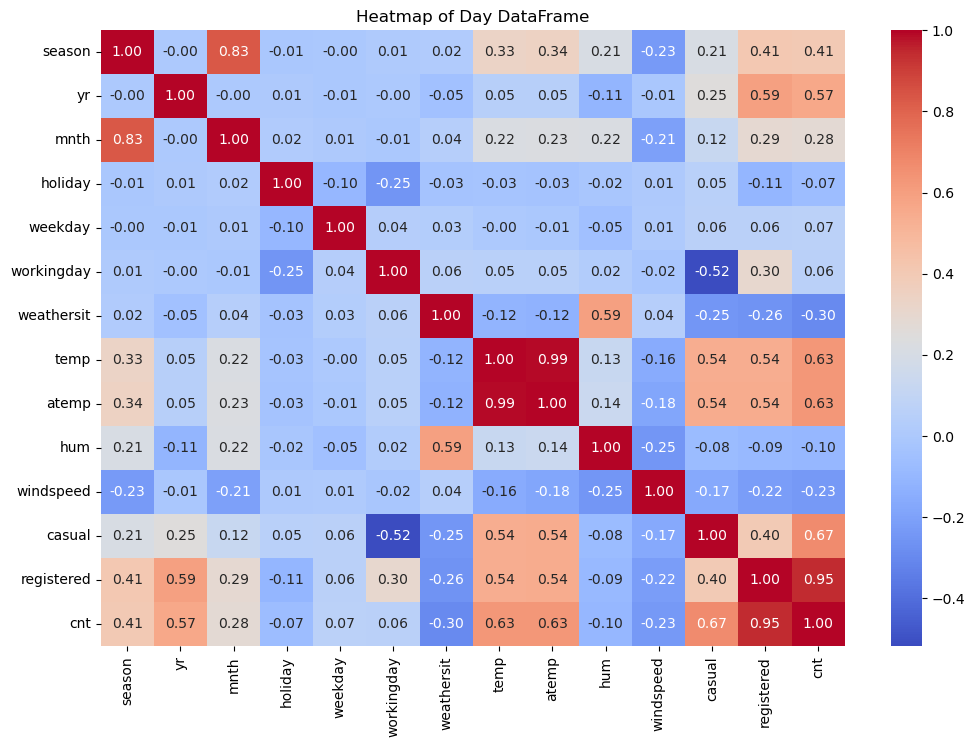

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(day_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Day DataFrame')
plt.show()

Beberapa hal menarik:
- Terlihat bahwa seasons berkorelasi tinggi terhadap month (0.87)
Hal ini karena setiap bulan memiliki musimnya sendiri
- Terlihat temp & atemp dengan cnt punya korelasi tinggi 0.63, hum dengan weathersit 0.59, dst

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren total penyewa sepeda (baik casual maupun registered) setiap bulannya pada tahun 2012 pada dataset day.csv?

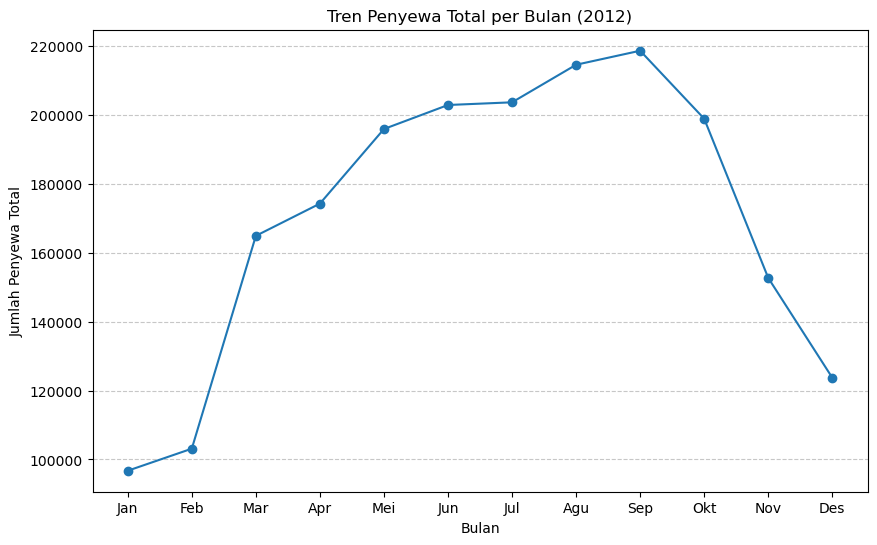

In [28]:
day_df_2012 = day_df[day_df['dteday'].dt.year == 2012]
monthly_trend_2012 = day_df_2012.groupby(day_df_2012['dteday'].dt.month)['cnt'].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_trend_2012.index, monthly_trend_2012.values, marker='o', linestyle='-')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewa Total')
plt.title('Tren Penyewa Total per Bulan (2012)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Pertanyaan 2: Bagaimana hubungan antara total penyewa sepeda dengan suhu temperatur lingkungan pada dataset day.csv?

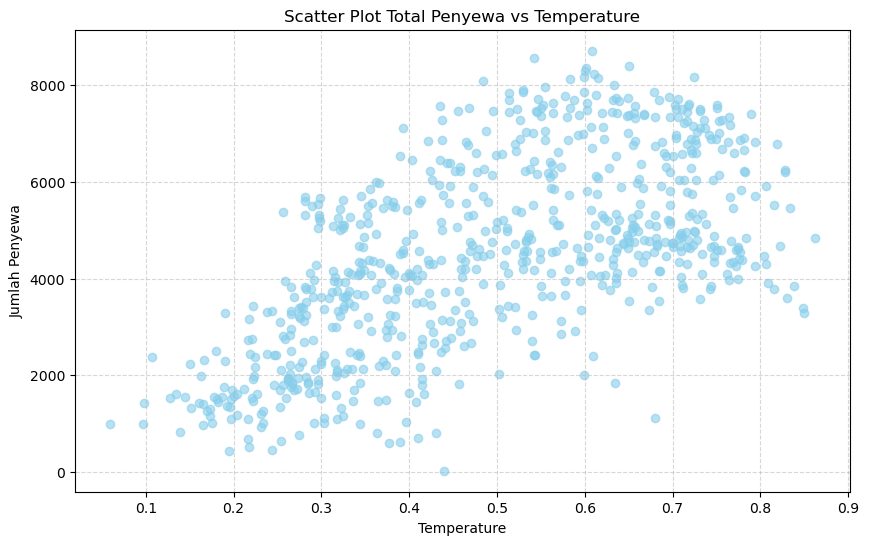

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(day_df['temp'], day_df['cnt'], color='skyblue', alpha=0.6)
plt.title('Scatter Plot Total Penyewa vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Jumlah Penyewa')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Pertanyaan 3: Musim apa yang paling banyak memiliki penyewa sepeda pada dataset day.csv?

<Figure size 1000x600 with 0 Axes>

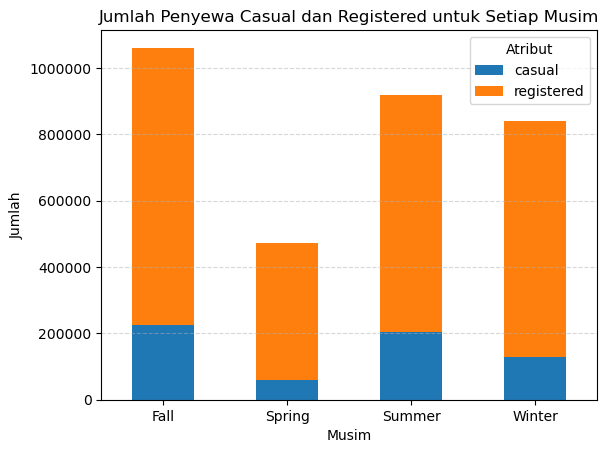

In [30]:
day_df1 = day_df.copy()
day_df1['season'] = day_df1['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
season_counts = day_df1.groupby('season')[['casual', 'registered']].sum()
plt.figure(figsize=(10, 6))
season_counts.plot(kind='bar', stacked=True)
plt.title('Jumlah Penyewa Casual dan Registered untuk Setiap Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Atribut')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Pertanyaan 4: Pada hari apakah masyarakat kebanyakan menyewa sepeda pada dataset day.csv?

<function matplotlib.pyplot.ticklabel_format(*, axis='both', style='', scilimits=None, useOffset=None, useLocale=None, useMathText=None)>

<Figure size 1000x600 with 0 Axes>

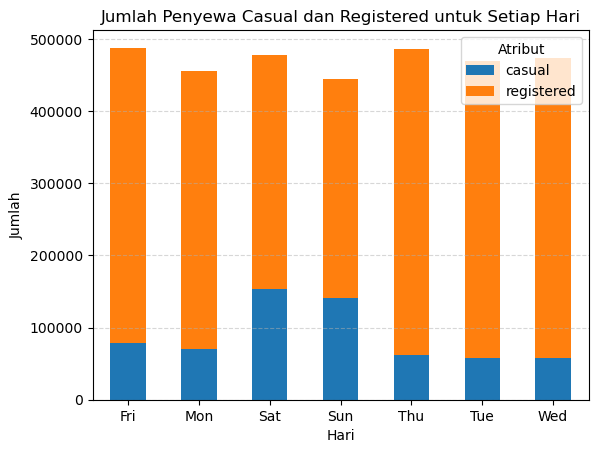

In [31]:
day_df2 = day_df.copy()
day_df2['weekday'] = day_df2['weekday'].replace({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})
counts = day_df2.groupby('weekday')[['casual', 'registered']].sum()
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', stacked=True)
plt.title('Jumlah Penyewa Casual dan Registered untuk Setiap Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Atribut')
plt.ticklabel_format

## Conclusion

- Conclution pertanyaan 1

Kita melihat tren penyewa per bulannya pada tahun 2012 dengan menggunakan Line Plot. kita bisa melihat bahwa pada Bulan September adalah bulan paling tinggi dan setelah itu mengalami penurunan yang signifikan hingga Januari. Pada Januari mulai naik lagi hingga September. Hal ini bisa diindikasikan adanya kemungkinan faktor cuaca, seperti pada bulan Okt-Jan adalah bulan-bulan Winter sehingga banyak orang yang jarang bersepeda.

- Conclution pertanyaan 2

Kita melihat hubungan antara total penyewa dengan temperatur dengan menggunakna scatter plot. Semakin tinggi temperaturnya semakin berkorelasi positif dengan jumlah penyewa. Mengindikasikan bahwa cuaca yang dingin adanya kecenderungan masyarakat jarang bersepeda.

- Conclution pertanyaan 3

Dengan menggunakan stacked bar chart, kita bisa melihat jumlah penyewa (casual dan resgistered) di setiap musim. Paling sedikit penyewa ada pada musim Spring dan tertinggi ada pada Fall. Lalu, Banyak penyewa berasal dari registered.

- Conclution pertanyaan 4

Dengan menggunakna stacked bar chart, kita bisa melihat jumlah penyewa (casual dan resgistered) di setiap harinya. Banyak pengguna casual yang melakukan rental sepeda pada hari libur (mengindikasikan penyewa musiman). Paling rendah adalah hari Minggu.